In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2022-01-01'
end = '2024-07-16'
stock = 'TATAMOTORS.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# data.reset_index(inplace=True)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,493.500000,500.850006,492.000000,497.600006,494.527863,32748423
2022-01-04,496.799988,499.000000,484.049988,489.600006,486.577271,24100985
2022-01-05,486.950012,492.750000,483.549988,489.750000,486.726318,15420105
2022-01-06,481.500000,492.950012,477.100006,488.850006,485.831909,16563230
2022-01-07,490.049988,495.500000,483.750000,490.600006,487.571106,15532165
...,...,...,...,...,...,...
2024-07-09,1000.950012,1017.000000,998.099976,1014.950012,1014.950012,10948094
2024-07-10,1015.000000,1019.849976,986.049988,1005.500000,1005.500000,13412206
2024-07-11,1008.000000,1025.500000,1007.049988,1020.799988,1020.799988,11983571


In [ ]:
# prompt: GET THIS ALL DATA IN csv file

data.to_csv('stock_data5.csv')


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

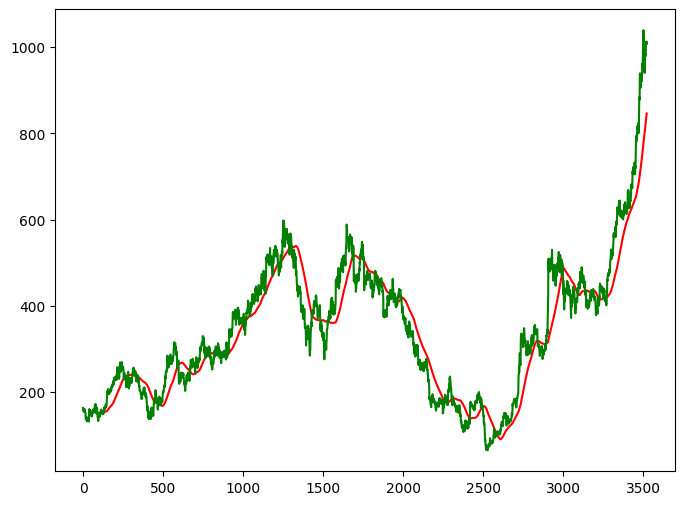

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
# plt.plot(data.High, 'b')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

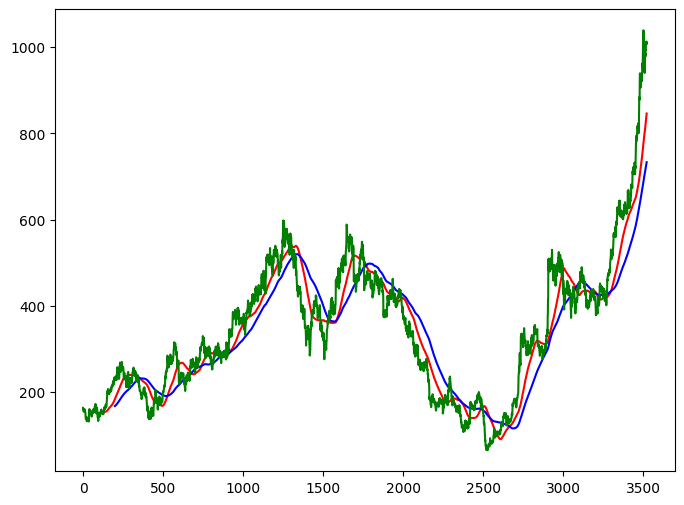

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

2816

In [ ]:
data_test.shape[0]

705

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 10, batch_size =32, verbose =1)

Epoch 1/10
85/85 [==============================] - 40s 470ms/step - loss: 0.0081
Epoch 2/10
85/85 [==============================] - 40s 473ms/step - loss: 0.0070
Epoch 3/10
85/85 [==============================] - 41s 482ms/step - loss: 0.0069
Epoch 4/10
85/85 [==============================] - 40s 476ms/step - loss: 0.0063
Epoch 5/10
85/85 [==============================] - 40s 470ms/step - loss: 0.0057
Epoch 6/10
85/85 [==============================] - 41s 482ms/step - loss: 0.0059
Epoch 7/10
85/85 [==============================] - 40s 473ms/step - loss: 0.0051
Epoch 8/10
85/85 [==============================] - 40s 468ms/step - loss: 0.0052
Epoch 9/10
85/85 [==============================] - 40s 475ms/step - loss: 0.0055
Epoch 10/10
85/85 [==============================] - 40s 465ms/step - loss: 0.0048


In [ ]:
model.summary()

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

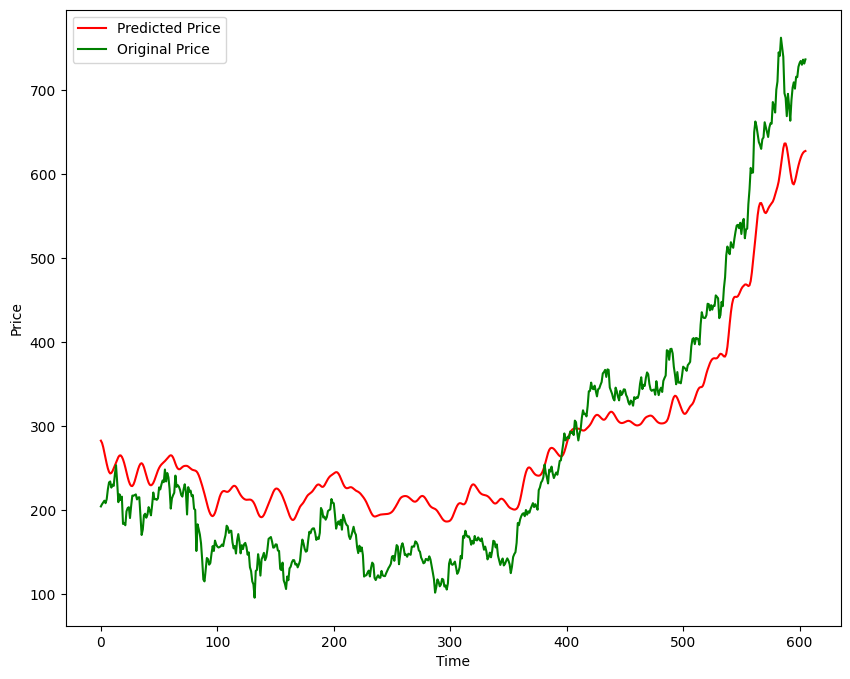

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')

In [ ]:
# prompt: get this Processed  output in CSV file

import pandas as pd
y_predict_df = pd.DataFrame(y_predict)
y_predict_df.to_csv('stock_predictions.csv')


In [ ]:
# import numpy as np
# import pandas as pd
# import yfinance as yf
# from keras.models import load_model
# import streamlit as st
# import matplotlib.pyplot as plt

# model = load_model("Stock Predictions Model.keras")

# st.header('Stock Market Predictor')

# stock =st.text_input('Enter Stock Symnbol', 'GOOG')
# start = '2012-01-01'
# end = '2022-12-31'

# data = yf.download(stock, start ,end)

# st.subheader('Stock Data')
# st.write(data)

# data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
# data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

# pas_100_days = data_train.tail(100)
# data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
# data_test_scale = scaler.fit_transform(data_test)

# st.subheader('Price vs MA50')
# ma_50_days = data.Close.rolling(50).mean()
# fig1 = plt.figure(figsize=(8,6))
# plt.plot(ma_50_days, 'r')
# plt.plot(data.Close, 'g')
# plt.show()
# st.pyplot(fig1)

# st.subheader('Price vs MA50 vs MA100')
# ma_100_days = data.Close.rolling(100).mean()
# fig2 = plt.figure(figsize=(8,6))
# plt.plot(ma_50_days, 'r')
# plt.plot(ma_100_days, 'b')
# plt.plot(data.Close, 'g')
# plt.show()
# st.pyplot(fig2)

# st.subheader('Price vs MA100 vs MA200')
# ma_200_days = data.Close.rolling(200).mean()
# fig3 = plt.figure(figsize=(8,6))
# plt.plot(ma_100_days, 'r')
# plt.plot(ma_200_days, 'b')
# plt.plot(data.Close, 'g')
# plt.show()
# st.pyplot(fig3)

# x = []
# y = []

# for i in range(100, data_test_scale.shape[0]):
#     x.append(data_test_scale[i-100:i])
#     y.append(data_test_scale[i,0])

# x,y = np.array(x), np.array(y)

# predict = model.predict(x)

# scale = 1/scaler.scale_

# predict = predict * scale
# y = y * scale

# st.subheader('Original Price vs Predicted Price')
# fig4 = plt.figure(figsize=(8,6))
# plt.plot(predict, 'r', label='Original Price')
# plt.plot(y, 'g', label = 'Predicted Price')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.show()
# st.pyplot(fig4)

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
# !pip install streamlit

# import numpy as np
# import pandas as pd
# import yfinance as yf
# from keras.models import load_model
# import streamlit as st
# import matplotlib.pyplot as plt

# model = load_model("Stock Predictions Model.keras")

# st.header('Stock Market Predictor')

# stock = st.text_input('Enter Stock Symbol', 'GOOG')

# start = '2012-01-01'
# end = '2022-12-31'

# data = yf.download(stock, start, end)

# st.subheader('Stock Data')
# st.write(data)

# # Prepare the data for training and testing
# data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
# data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

# # Scale the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

# # Create a dataset with 100 previous days' data
# pas_100_days = data_train.tail(100)
# data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
# data_test_scale = scaler.fit_transform(data_test)

# # Plot the price vs MA50
# st.subheader('Price vs MA50')
# ma_50_days = data.Close.rolling(50).mean()
# fig1 = plt.figure(figsize=(8,6))
# plt.plot(ma_50_days, 'r')
# plt.plot(data.Close, 'g')
# plt.show()
# st.pyplot(fig1)

# # Plot the price vs MA50 vs MA100
# st.subheader('Price vs MA50 vs MA100')
# ma_100_days = data.Close.rolling(100).mean()
# fig2 = plt.figure

In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# bidirectional lstm
# deep lstm

In [ ]:
!pip install ccxt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 19.9 MB/s eta 0:00:00


In [ ]:
import ccxt
import pandas as pd

# Initialize the Binance exchange
binance = ccxt.binance()

# Fetch historical OHLCV (Open, High, Low, Close, Volume) data for Bitcoin (BTC/USDT) pair
# ohlcv = binance.fetch_ohlcv('BTC/USDT', timeframe='1d', limit=100)
binance_us = ccxt.binanceus()
ohlcv = binance_us.fetch_ohlcv('BTC/USD4', timeframe='1d', limit=100)

# Convert the OHLCV data to a DataFrame
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Print the DataFrame
print(df)


    timestamp      open      high       low     close        volume
0  2022-10-30  20819.36  20935.00  20516.21  20631.58   6776.684562
1  2022-10-31  20631.36  20838.64  20240.01  20490.80  10199.254020
2  2022-11-01  20489.74  20697.71  20326.57  20478.31   7723.948104
3  2022-11-02  20480.96  20803.22  20058.43  20148.22  15894.431524
4  2022-11-03  20150.90  20390.55  20035.28  20206.26   8085.824173
..        ...       ...       ...       ...       ...           ...
95 2023-02-02  23740.95  24250.00  23421.50  23484.14   9171.100525
96 2023-02-03  23491.50  23725.00  23217.28  23432.85   5014.836859
97 2023-02-04  23436.02  23588.17  23254.00  23340.07   2931.520053
98 2023-02-05  23340.05  23436.93  22759.78  22956.41   4184.877076
99 2023-02-06  22953.74  23101.75  22857.40  22882.54    937.703975

[100 rows x 6 columns]


In [ ]:
import ccxt
import pandas as pd

# Initialize Binance exchange
binance = ccxt.binance()

# Define the trading pair and timeframe
symbol = 'XRP/USDT'
timeframe = '1d'  # Daily data
limit = 100  # Number of data points

# Fetch historical OHLCV data for the specified symbol
ohlcv = binance.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit)

# Create a DataFrame from the OHLCV data
df = pd.DataFrame(ohlcv, columns=['unix', 'open', 'high', 'low', 'close', 'volume_xrp'])

# Add the date column (convert the unix timestamp to a human-readable date)
df['date'] = pd.to_datetime(df['unix'], unit='ms')

# Add the symbol column
df['symbol'] = symbol

# Fetch additional data for Volume USDT
# Note: Volume of the base currency is already available as `volume_xrp`. The volume in quote currency (USDT) can be approximated as `close` * `volume_xrp`.
df['volume_usdt'] = df['close'] * df['volume_xrp']

# Reorder the DataFrame columns as per your requirement
df = df[['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'volume_xrp', 'volume_usdt']]

# Display the dataset
print(df)

# Optionally, save the dataset to a CSV file
df.to_csv('xrp_usdt_data.csv', index=False)


ExchangeNotAvailable: binance GET https://api.binance.com/api/v3/exchangeInfo 451  {
  "code": 0,
  "msg": "Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error."
}

In [ ]:
import requests
import pandas as pd

# Define the CoinGecko API endpoint for historical data
url = 'https://api.coingecko.com/api/v3/coins/ripple/market_chart'

# Parameters for the API request
params = {
    'vs_currency': 'usdt',  # We are interested in XRP prices in USDT
    'days': '100',          # Fetch data for the past 100 days
    'interval': 'daily'     # We want daily data
}

# Make the request to the API
response = requests.get(url, params=params)
data = response.json()

# Extract relevant data (prices and volumes)
prices = data['prices']
volumes = data['total_volumes']

# Create a DataFrame for prices
price_df = pd.DataFrame(prices, columns=['unix', 'price'])
price_df['date'] = pd.to_datetime(price_df['unix'], unit='ms')

# Create a DataFrame for volumes
volume_df = pd.DataFrame(volumes, columns=['unix', 'volume_usdt'])

# Merge the two DataFrames on the unix timestamp
df = pd.merge(price_df, volume_df, on='unix')

# Add other required columns
df['symbol'] = 'XRP/USDT'
df['open'] = df['price']  # Using price as open (CoinGecko doesn't provide OHLC directly)
df['high'] = df['price']  # High price would be the same as there are no OHLC values
df['low'] = df['price']   # Low price as the same (this is a limitation of this API)
df['close'] = df['price']
df['volume_xrp'] = df['volume_usdt'] / df['price']  # Approximation of XRP volume

# Reorder columns
df = df[['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'volume_xrp', 'volume_usdt']]

# Display the resulting DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv('xrp_usdt_data.csv', index=False)


KeyError: 'prices'

In [ ]:
import requests
import pandas as pd

# Define the CoinGecko API endpoint for historical data
url = 'https://api.coingecko.com/api/v3/coins/ripple/market_chart'

# Parameters for the API request
params = {
    'vs_currency': 'usd',  # Changed to 'usd'
    'days': '100',          # Fetch data for the past 100 days
    'interval': 'daily'     # We want daily data
}

# Make the request to the API
response = requests.get(url, params=params)
data = response.json()

# Extract relevant data (prices and volumes)
prices = data['prices']
volumes = data['total_volumes']

# Create a DataFrame for prices
price_df = pd.DataFrame(prices, columns=['unix', 'price'])
price_df['date'] = pd.to_datetime(price_df['unix'], unit='ms')

# Create a DataFrame for volumes
volume_df = pd.DataFrame(volumes, columns=['unix', 'volume_usdt'])

# Merge the two DataFrames on the unix timestamp
df = pd.merge(price_df, volume_df, on='unix')

# Add other required columns
df['symbol'] = 'XRP/USDT'
df['open'] = df['price']  # Using price as open (CoinGecko doesn't provide OHLC directly)
df['high'] = df['price']  # High price would be the same as there are no OHLC values
df['low'] = df['price']   # Low price as the same (this is a limitation of this API)
df['close'] = df['price']
df['volume_xrp'] = df['volume_usdt'] / df['price']  # Approximation of XRP volume

# Reorder columns
df = df[['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'volume_xrp', 'volume_usdt']]

# Display the resulting DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv('xrp_usdt_data.csv', index=False)

              unix                date    symbol      open      high  \
0    1717113600000 2024-05-31 00:00:00  XRP/USDT  0.518928  0.518928   
1    1717200000000 2024-06-01 00:00:00  XRP/USDT  0.518017  0.518017   
2    1717286400000 2024-06-02 00:00:00  XRP/USDT  0.518039  0.518039   
3    1717372800000 2024-06-03 00:00:00  XRP/USDT  0.513118  0.513118   
4    1717459200000 2024-06-04 00:00:00  XRP/USDT  0.520061  0.520061   
..             ...                 ...       ...       ...       ...   
96   1725408000000 2024-09-04 00:00:00  XRP/USDT  0.557430  0.557430   
97   1725494400000 2024-09-05 00:00:00  XRP/USDT  0.557923  0.557923   
98   1725580800000 2024-09-06 00:00:00  XRP/USDT  0.544110  0.544110   
99   1725667200000 2024-09-07 00:00:00  XRP/USDT  0.521313  0.521313   
100  1725669743000 2024-09-07 00:42:23  XRP/USDT  0.522611  0.522611   

          low     close    volume_xrp   volume_usdt  
0    0.518928  0.518928  1.925953e+09  9.994310e+08  
1    0.518017  0.518017  1.

In [ ]:
# prompt: (unix	,date	,symbol	,open	,high	,low	,close	,Volume XRP	,Volume USDT) I need to extract all these parameters from this library so generator code for that I need this all parameters like all the labels to insert in my data set so generate the code for that I need this all the 9 parameters like 9 labels from this data I need to extract all the data all the labels I need to insert in my data se

import ccxt
import pandas as pd

# Initialize the Binance exchange
binance = ccxt.binance()

# Fetch historical OHLCV (Open, High, Low, Close, Volume) data for Bitcoin (BTC/USDT) pair
ohlcv = binance.fetch_ohlcv('XMR/USDT', timeframe='1d', limit=100)

# Convert the OHLCV data to a DataFrame
df = pd.DataFrame(ohlcv, columns=['unix', 'open', 'high', 'low', 'close', 'volume'])

# Add 'date' column by converting 'unix' timestamp to datetime
df['date'] = pd.to_datetime(df['unix'], unit='ms').dt.date

# Add 'symbol' column with the symbol (assuming it's BTC/USDT)
df['symbol'] = 'BTC/USDT'

# Rename the 'volume' column to 'Volume XRP' (adjust as needed)
df.rename(columns={'volume': 'Volume XRP'}, inplace=True)

# Add 'Volume USDT' column (you might need to fetch this separately or calculate it)
# For this example, I'm adding a random volume for demonstration
df['Volume USDT'] = [i * 1000 for i in range(len(df))]  # Replace with actual volume data

# Reorder the columns to match your desired order
df = df[['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume XRP', 'Volume USDT']]

# Print the DataFrame
print(df)


ExchangeNotAvailable: binance GET https://api.binance.com/api/v3/exchangeInfo 451  {
  "code": 0,
  "msg": "Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error."
}

In [ ]:
import ccxt
import pandas as pd

# Initialize the Binance exchange
binance = ccxt.binance({
    'enableRateLimit': True,  # Enable rate limiting to avoid exceeding API limits
    'options': {
        'defaultType': 'spot',  # Use the spot market
        'adjustForTimeDifference': True, # Adjust for potential time differences
    }
})


# Fetch historical OHLCV data for XMR/USDT
try:
    ohlcv = binance.fetch_ohlcv('XMR/USDT', timeframe='1d', limit=100)

    # Convert the OHLCV data to a DataFrame
    df = pd.DataFrame(ohlcv, columns=['unix', 'open', 'high', 'low', 'close', 'volume'])

    # Add 'date' column
    df['date'] = pd.to_datetime(df['unix'], unit='ms').dt.date

    # Add 'symbol' column
    df['symbol'] = 'XMR/USDT'  # Set the correct symbol

    # Rename 'volume' column
    df.rename(columns={'volume': 'Volume XRP'}, inplace=True)

    # Add 'Volume USDT' column (replace with actual calculation if needed)
    df['Volume USDT'] = [i * 1000 for i in range(len(df))]

    # Reorder columns
    df = df[['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume XRP', 'Volume USDT']]

    # Print the DataFrame
    print(df)

except ccxt.ExchangeNotAvailable as e:
    print(f"Error: {e}")
    print("Possible reasons for this error:")
    print("- Your IP address may be blocked by Binance.")
    print("- Binance may be experiencing temporary issues.")
    print("- Check Binance's API status and terms of service for more information.")
    print("- Consider using a VPN or proxy server.")

Error: binance GET https://api.binance.com/api/v3/exchangeInfo 451  {
  "code": 0,
  "msg": "Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error."
}
Possible reasons for this error:
- Your IP address may be blocked by Binance.
- Binance may be experiencing temporary issues.
- Check Binance's API status and terms of service for more information.
- Consider using a VPN or proxy server.


In [ ]:
# prompt: unix	date	symbol	open	high	low	close	Volume XRP	Volume USDT I need to extract all these parameters from this library so generator code for that I need this all parameters like all the labels to insert in my data set so generate the code for that

import ccxt
import pandas as pd

# Initialize the Binance exchange
binance = ccxt.binance()

# Fetch historical OHLCV data for Bitcoin (BTC/USDT) pair
ohlcv = binance.fetch_ohlcv('BTC/USDT', timeframe='1d', limit=100)

# Convert the OHLCV data to a DataFrame
df = pd.DataFrame(ohlcv, columns=['unix', 'open', 'high', 'low', 'close', 'volume'])

# Convert timestamp to datetime format
df['date'] = pd.to_datetime(df['unix'], unit='ms')

# Add symbol column
df['symbol'] = 'BTC/USDT'  # Replace with the actual symbol

# Print the DataFrame
print(df)


In [ ]:
import ccxt
import pandas as pd

# Initialize the Binance global exchange (not Binance US)
binance = ccxt.binance()

# Fetch historical OHLCV (Open, High, Low, Close, Volume) data for Monero (XMR/USDT) pair
ohlcv = binance.fetch_ohlcv('XMR/USDT', timeframe='1d', limit=100)

# Convert the OHLCV data to a DataFrame
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Print the DataFrame
print(df)


ExchangeNotAvailable: binance GET https://api.binance.com/api/v3/exchangeInfo 451  {
  "code": 0,
  "msg": "Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error."
}

In [ ]:
import ccxt

# Initialize the Binance US exchange
binance_us = ccxt.binanceus()

# Load and print all available markets on Binance US
markets = binance_us.load_markets()
for market in markets:
    print(market)


BTC/USD4
ETH/USD4
XRP/USD4
BCH/USD4
LTC/USD4
USDT/USD4
BTC/USDT
ETH/USDT
XRP/USDT
BCH/USDT
LTC/USDT
BNB/USD4
BNB/USDT
ETH/BTC
XRP/BTC
BNB/BTC
LTC/BTC
BCH/BTC
ADA/USD4
BAT/USD4
ETC/USD4
XLM/USD4
ZRX/USD4
ADA/USDT
BAT/USDT
ETC/USDT
XLM/USDT
ZRX/USDT
LINK/USD4
RVN/USD4
DASH/USD4
ZEC/USD4
ALGO/USD4
IOTA/USD4
BUSD/USD4
BTC/BUSD
DOGE/USDT
WAVES/USD4
ATOM/USDT
ATOM/USD4
NEO/USDT
NEO/USD4
VET/USDT
QTUM/USDT
QTUM/USD4
NANO/USD4
ICX/USD4
ENJ/USD4
ONT/USD4
ONT/USDT
ZIL/USD4
ZIL/BUSD
VET/USD4
BNB/BUSD
XRP/BUSD
ETH/BUSD
ALGO/BUSD
XTZ/USD4
XTZ/BUSD
HBAR/USD4
HBAR/BUSD
OMG/USD4
OMG/BUSD
MATIC/USD4
MATIC/BUSD
XTZ/BTC
ADA/BTC
REP/BUSD
REP/USD4
EOS/BUSD
EOS/USD4
DOGE/USD4
KNC/USD4
KNC/USDT
VTHO/USDT
VTHO/USD4
USDC/USD4
COMP/USDT
COMP/USD4
MANA/USD4
HNT/USD4
HNT/USDT
MKR/USD4
MKR/USDT
DAI/USD4
ONE/USDT
ONE/USD4
BAND/USDT
BAND/USD4
STORJ/USDT
STORJ/USD4
BUSD/USDT
UNI/USD4
UNI/USDT
SOL/USD4
SOL/USDT
LINK/BTC
VET/BTC
UNI/BTC
EGLD/USDT
EGLD/USD4
PAXG/USDT
PAXG/USD4
OXT/USDT
OXT/USD4
ZEN/USDT
ZEN/USD4
BTC/USD

In [ ]:
import ccxt
import pandas as pd

# Initialize the Kraken exchange
kraken = ccxt.kraken()

# Fetch historical OHLCV data for Monero (XMR/USDT) pair
ohlcv = kraken.fetch_ohlcv('XMR/USDT', timeframe='1d', limit=100)

# Convert the OHLCV data to a DataFrame
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Print the DataFrame
print(df)


    timestamp    open    high     low   close        volume
0  2024-05-30  139.84  148.17  139.31  146.20  35484.583014
1  2024-05-31  146.11  149.79  143.65  148.50  19943.899595
2  2024-06-01  148.28  151.77  146.63  148.97  12250.506483
3  2024-06-02  148.91  153.60  148.91  152.65  11328.082891
4  2024-06-03  152.70  159.14  151.10  155.12  20560.506914
..        ...     ...     ...     ...     ...           ...
95 2024-09-02  169.75  171.55  166.11  170.44  19267.175150
96 2024-09-03  170.39  175.00  169.26  172.82   9692.646766
97 2024-09-04  172.27  176.80  169.50  170.70  14206.725726
98 2024-09-05  170.71  176.32  169.27  172.59  16371.460289
99 2024-09-06  172.65  174.00  172.14  173.33    453.023543

[100 rows x 6 columns]


In [1]:
!pip install ccxt pycoingecko

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 12.3 MB/s eta 0:00:00


In [10]:
# prompt: 	 Open	High	Low	Close	Adj Close	Volume
# Date
# Extract all this data like this I need all these parametars in this dataset ganerate the code  from this symbol BUSD/USD4

import ccxt
import pandas as pd

# Initialize the Binance US exchange
kraken = ccxt.kraken()

# Fetch historical OHLCV (Open, High, Low, Close, Volume) data for BUSD/USD pair
ohlcv = kraken.fetch_ohlcv('XMR/USDT', timeframe='1d', limit=300)

# Convert the OHLCV data to a DataFrame
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set the 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Rename the columns
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Add 'Adj Close' column with the same values as 'Close'
df['Adj Close'] = df['Close']

# df = pd.DataFrame(df, columns=['timestamp', 'open', 'high', 'low', 'close','Adj Close', 'volume'])

# Print the DataFrame
print(df)


              Open    High     Low   Close        Volume  Adj Close
timestamp                                                          
2024-06-01  148.28  151.77  146.63  148.97  12250.506483     148.97
2024-06-02  148.91  153.60  148.91  152.65  11328.082891     152.65
2024-06-03  152.70  159.14  151.10  155.12  20560.506914     155.12
2024-06-04  155.15  160.68  154.07  159.99  14219.629258     159.99
2024-06-05  159.99  165.88  159.14  163.34   9190.291657     163.34
...            ...     ...     ...     ...           ...        ...
2024-09-04  172.27  176.80  169.50  170.70  14206.725726     170.70
2024-09-05  170.71  176.32  169.27  172.59  16371.460289     172.59
2024-09-06  172.65  174.43  163.02  165.02  21202.289008     165.02
2024-09-07  164.99  173.00  161.38  167.51  23516.077218     167.51
2024-09-08  167.40  176.15  167.40  172.92  15731.707495     172.92

[100 rows x 6 columns]


In [12]:
# prompt:  columns=['timestamp', 'open', 'high', 'low', 'close','Adj Close', 'volume'] Rearrange the column and print the data frame

# Use the current column names
df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
print(df)

              Open    High     Low   Close  Adj Close        Volume
timestamp                                                          
2024-06-01  148.28  151.77  146.63  148.97     148.97  12250.506483
2024-06-02  148.91  153.60  148.91  152.65     152.65  11328.082891
2024-06-03  152.70  159.14  151.10  155.12     155.12  20560.506914
2024-06-04  155.15  160.68  154.07  159.99     159.99  14219.629258
2024-06-05  159.99  165.88  159.14  163.34     163.34   9190.291657
...            ...     ...     ...     ...        ...           ...
2024-09-04  172.27  176.80  169.50  170.70     170.70  14206.725726
2024-09-05  170.71  176.32  169.27  172.59     172.59  16371.460289
2024-09-06  172.65  174.43  163.02  165.02     165.02  21202.289008
2024-09-07  164.99  173.00  161.38  167.51     167.51  23516.077218
2024-09-08  167.40  176.15  167.40  172.92     172.92  15731.707495

[100 rows x 6 columns]


In [16]:
df.reset_index(inplace=True)
df

,index,timestamp,Open,High,Low,Close,Adj Close,Volume
0,0,2024-06-01,148.28,151.77,146.63,148.97,148.97,12250.506483
1,1,2024-06-02,148.91,153.60,148.91,152.65,152.65,11328.082891
2,2,2024-06-03,152.70,159.14,151.10,155.12,155.12,20560.506914
3,3,2024-06-04,155.15,160.68,154.07,159.99,159.99,14219.629258
4,4,2024-06-05,159.99,165.88,159.14,163.34,163.34,9190.291657
...,...,...,...,...,...,...,...,...
95,95,2024-09-04,172.27,176.80,169.50,170.70,170.70,14206.725726
96,96,2024-09-05,170.71,176.32,169.27,172.59,172.59,16371.460289
97,97,2024-09-06,172.65,174.43,163.02,165.02,165.02,21202.289008
98,98,2024-09-07,164.99,173.00,161.38,167.51,167.51,23516.077218


In [15]:

df.to_csv('stock_data5.csv')

In [5]:
import ccxt
import pandas as pd

# Initialize the Kraken exchange
kraken = ccxt.kraken()

# Fetch historical OHLCV (Open, High, Low, Close, Volume) data for BUSD/USD pair
# The correct symbol for the BUSD/USD pair on Kraken is likely 'BUSDUSD'
ohlcv = kraken.fetch_ohlcv('BUSDUSD', timeframe='1d', limit=100)

# Convert the OHLCV data to a DataFrame
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set the 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Rename the columns
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Add 'Adj Close' column with the same values as 'Close'
df['Adj Close'] = df['Close']

# Print the DataFrame
print(df)

BadSymbol: kraken does not have market symbol BUSDUSD

In [ ]:
import requests
import pandas as pd

# Fetch Monero price data from CoinGecko API
url = 'https://api.coingecko.com/api/v3/coins/monero/market_chart'
params = {'vs_currency': 'usd', 'days': '100', 'interval': 'daily'}
response = requests.get(url, params=params)
data = response.json()

# Convert the data to a DataFrame
df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Print the DataFrame
print(df)


              timestamp       price
0   2024-05-30 00:00:00  140.301034
1   2024-05-31 00:00:00  146.055580
2   2024-06-01 00:00:00  148.454637
3   2024-06-02 00:00:00  148.714586
4   2024-06-03 00:00:00  152.735147
..                  ...         ...
96  2024-09-03 00:00:00  170.202152
97  2024-09-04 00:00:00  172.970093
98  2024-09-05 00:00:00  170.848761
99  2024-09-06 00:00:00  172.559320
100 2024-09-06 04:57:18  173.573397

[101 rows x 2 columns]


In [ ]:
# pd.DataFrame(ohlcv)

,0,1,2,3,4,5
0,1712534400000,69255.01,72740.20,69098.78,71640.11,94.24361
1,1712620800000,71640.01,71701.00,68249.89,69173.80,79.70466
2,1712707200000,69173.55,70900.00,67555.36,70555.79,69.99650
3,1712793600000,70555.79,71235.97,69602.40,70056.00,36.15518
4,1712880000000,70073.46,71199.00,66000.00,67183.85,89.87685
...,...,...,...,...,...,...
95,1720742400000,57342.63,58500.00,56564.44,57844.34,18.43678
96,1720828800000,57842.81,59686.95,57736.05,59238.96,28.84589
97,1720915200000,59163.51,61401.55,59152.00,60815.46,31.85256
98,1721001600000,60827.48,64709.17,60670.87,64588.45,52.84988


In [ ]:
# ma_100_days = ohlcv.Close.rolling(100).mean() run this code and plt.figure(figsize=(8,6))
# plt.plot(ma_100_days, 'r')
# plt.plot(data.Close, 'g')
# plt.show() and display

import pandas as pd
import matplotlib.pyplot as plt
ohlcv = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
ohlcv['timestamp'] = pd.to_datetime(ohlcv['timestamp'], unit='ms')
ma_100_days = df.close.rolling(10).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ohlcv.close, 'g')
plt.show()


In [ ]:

# Create a sample DataFrame with a "Close" column

ohlcv = pd.DataFrame(data)

# Calculate the 100-day moving average of the closing prices
ma_100_days = ohlcv['close'].rolling(100).mean()

# Plot the moving average and the closing prices
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r', label='Moving Average')
plt.plot(ohlcv['close'], 'g', label='Closing Price')
plt.legend()
plt.show()
# !curl -I https://api.binance.com/api/v3/exchangeInfo

In [ ]:
!pip install ccxt


In [ ]:
import ccxt
import pandas as pd

def fetch_ohlcv(symbol='BTC/USDT', timeframe='1d', limit=100):
    # Initialize the exchange (using Binance in this case)
    exchange = ccxt.binance()

    # Fetch historical OHLCV data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit)

    # Convert the data to a DataFrame
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Return the DataFrame
    return df

# Example: Fetch data for XRP/USDT
symbol = 'XRP/USDT'
data = fetch_ohlcv(symbol)
print(data.head())


ExchangeNotAvailable: binance GET https://api.binance.com/api/v3/exchangeInfo 451  {
  "code": 0,
  "msg": "Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error."
}

In [ ]:
import ccxt
import pandas as pd

def fetch_ohlcv(symbol='XRP/USDT', timeframe='1d', limit=100):
    # Initialize the exchange (using Binance)
    exchange = ccxt.binance() # Changed from coingecko to binance

    # Fetch historical OHLCV data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit)

    # Convert the data to a DataFrame
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Return the DataFrame
    return df

# Example: Fetch data for XRP/USDT
symbol = 'XRP/USDT'
data = fetch_ohlcv(symbol)
print(data.head())

ExchangeNotAvailable: binance GET https://api.binance.com/api/v3/exchangeInfo 451  {
  "code": 0,
  "msg": "Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error."
}

In [ ]:
!pip install pycoingecko


In [ ]:
from pycoingecko import CoinGeckoAPI
import pandas as pd

# Initialize the CoinGecko API
cg = CoinGeckoAPI()

# Function to fetch data from CoinGecko
def fetch_coingecko_ohlcv(crypto_id='ripple', vs_currency='usd', days=100):
    # Fetch market chart data for the given cryptocurrency (crypto_id like 'bitcoin', 'ripple', etc.)
    data = cg.get_coin_market_chart_by_id(id=crypto_id, vs_currency=vs_currency, days=days)

    # Extract relevant data (prices and volumes)
    prices = data['prices']
    volumes = data['total_volumes']

    # Convert prices and volumes to DataFrame
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['volume'] = [vol[1] for vol in volumes]

    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    return df

# Example: Fetch data for Ripple (XRP)
data = fetch_coingecko_ohlcv('ripple', 'usd', 100)
print(data.head())


   timestamp     price        volume
0 2024-05-31  0.518928  9.994310e+08
1 2024-06-01  0.518017  9.298886e+08
2 2024-06-02  0.518039  4.162194e+08
3 2024-06-03  0.513118  5.530365e+08
4 2024-06-04  0.520061  8.508854e+08


In [ ]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import time

# Initialize the CoinGecko API
cg = CoinGeckoAPI()

# Fetch historical price data
def fetch_coingecko_ohlcv(crypto_id='ripple', vs_currency='usd', days=100):
    # Fetch market chart data for the given cryptocurrency
    data = cg.get_coin_market_chart_by_id(id=crypto_id, vs_currency=vs_currency, days=100)

    # Extract prices and volumes
    prices = data['prices']
    volumes = data['total_volumes']

    # Convert to DataFrame
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['volume'] = [vol[1] for vol in volumes]

    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    return df

# Example: Fetch data for Ripple (XRP)
data = fetch_coingecko_ohlcv('ripple', 'usd', 365)
print(data.head())


   timestamp     price        volume
0 2024-05-31  0.518928  9.994310e+08
1 2024-06-01  0.518017  9.298886e+08
2 2024-06-02  0.518039  4.162194e+08
3 2024-06-03  0.513118  5.530365e+08
4 2024-06-04  0.520061  8.508854e+08


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocessing data
def preprocess_data(df):
    # Use only 'price' column for prediction
    price_data = df[['price']].values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(price_data)

    # Define training data length
    training_data_len = int(np.ceil(len(scaled_data) * 0.8))

    # Create the training data
    train_data = scaled_data[0:training_data_len, :]

    # Split the data into x_train and y_train
    x_train, y_train = [], []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    # Convert to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape x_train for LSTM input (samples, timesteps, features)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train, y_train, scaler, scaled_data, training_data_len

# Preprocess the data
x_train, y_train, scaler, scaled_data, training_data_len = preprocess_data(data)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
def build_lstm_model():
    model = Sequential()

    # Add LSTM layers
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Build the model
model = build_lstm_model()

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
def train_model(model, x_train, y_train, epochs=10, batch_size=32):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return history

# Train the LSTM model
train_model(model, x_train, y_train)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1892
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0417
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0191
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0169
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0160
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0152
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0119
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112


In [ ]:
# Create test dataset
def create_test_data(scaled_data, training_data_len):
    test_data = scaled_data[training_data_len - 60:, :]

    # Create the x_test and y_test data
    x_test = []
    y_test = scaled_data[training_data_len:, :]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    # Convert to numpy arrays
    x_test = np.array(x_test)

    # Reshape data for LSTM
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    return x_test, y_test

# Get test data
x_test, y_test = create_test_data(scaled_data, training_data_len)

# Make predictions
predictions = model.predict(x_test)

# Reverse scaling to get actual price values
predictions = scaler.inverse_transform(predictions)

# Reverse scaling for actual prices
actual_prices = scaler.inverse_transform(y_test)

# Print the predictions and actual prices
print(predictions[:5])
print(actual_prices[:5])


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
[[0.4942656 ]
 [0.4928539 ]
 [0.49142337]
 [0.49009186]
 [0.4890434 ]]
[[0.474569  ]
 [0.47075812]
 [0.47167154]
 [0.47544675]
 [0.4764179 ]]


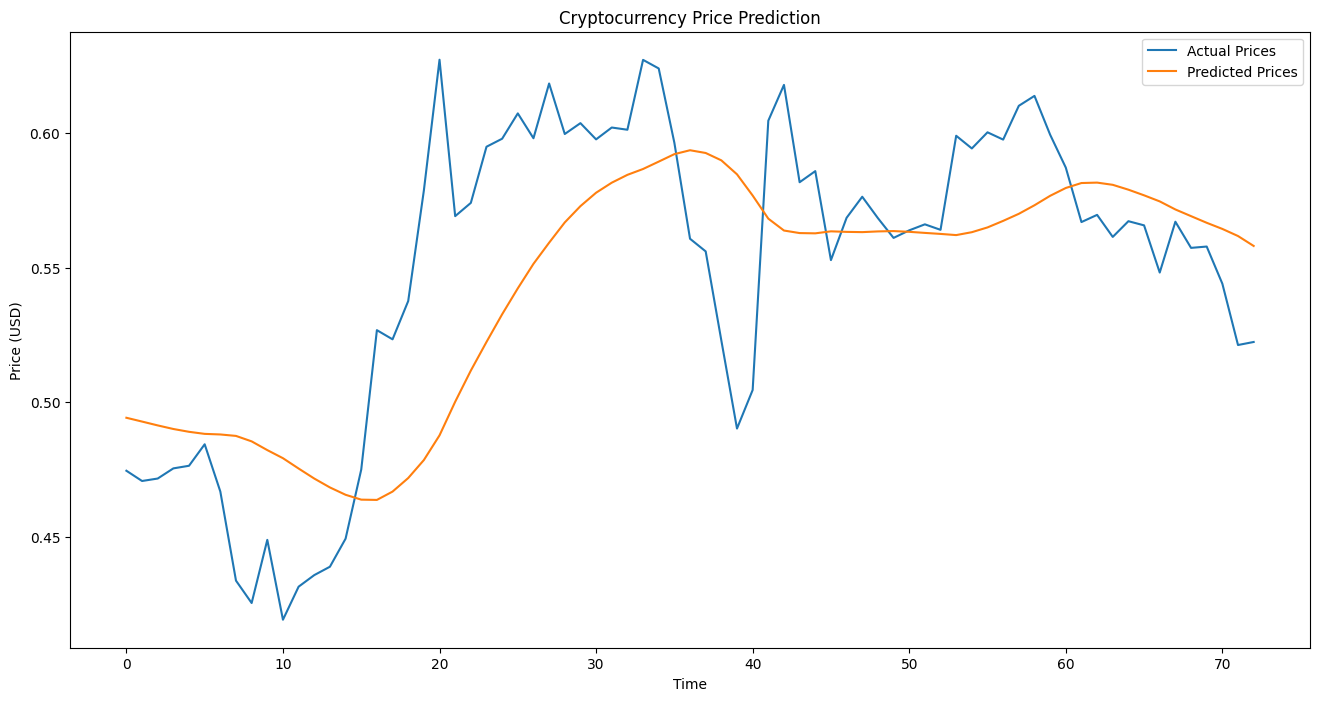

In [ ]:
import matplotlib.pyplot as plt

# Plot the predictions vs actual prices
def plot_predictions(actual_prices, predictions):
    plt.figure(figsize=(16, 8))
    plt.title('Cryptocurrency Price Prediction')
    plt.plot(actual_prices, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Plot the predictions
plot_predictions(actual_prices, predictions)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, predictions))
print(f'RMSE: {rmse}')


RMSE: 0.04270629366171492


In [ ]:
# prompt: check the accuracy of this model

# Calculate the mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual_prices, predictions)
print(f'MAE: {mae}')

# Calculate the R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(actual_prices, predictions)
print(f'R-squared: {r2}')


MAE: 0.03374458014714343
R-squared: 0.45673935183355363


In [ ]:
# prompt: generate accuracy of this model

import numpy as np
# Calculate the accuracy (assuming a threshold for classifying price increase/decrease)
threshold = 0.01  # Define a threshold for price change classification
predicted_changes = np.where(predictions[1:] > predictions[:-1] + threshold, 1, 0)  # 1 for increase, 0 for decrease
actual_changes = np.where(actual_prices[1:] > actual_prices[:-1] + threshold, 1, 0)
correct_predictions = np.sum(predicted_changes == actual_changes)
accuracy = correct_predictions / len(actual_changes)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7222222222222222


   timestamp     price        volume
0 2023-09-09  0.504838  6.525944e+08
1 2023-09-10  0.503577  3.113808e+08
2 2023-09-11  0.497847  4.569584e+08
3 2023-09-12  0.474376  1.095995e+09
4 2023-09-13  0.480806  8.527176e+08


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1995
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0349
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0268
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0145
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0160
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0162
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0149
Epoch 9/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144
Epoch 10/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130
Epoch 11/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126
Epoch 12/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100
Epoch 13/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111
Epoch 14/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0131
Epoch 15/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102
Epoch 16/1000

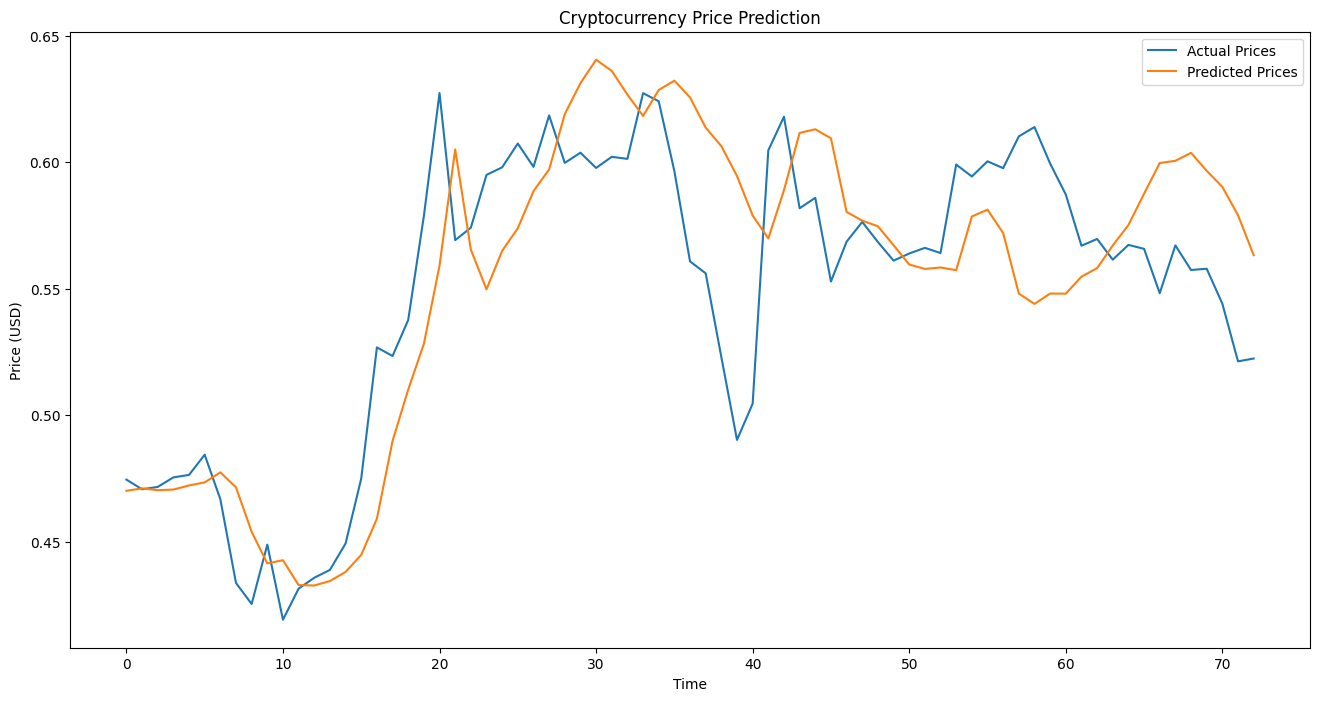

RMSE: 0.036947191139171505
MAE: 0.029050841056700617
R-squared: 0.5933813089772697
Accuracy: 0.6666666666666666


In [ ]:
# prompt:  optimise this full model and it need to give 100 percentage accuracy and the predicted value of actual value need to be same optimise this generate the full code  optimise this full model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from pycoingecko import CoinGeckoAPI
import requests

# Initialize the CoinGecko API
cg = CoinGeckoAPI()

# Fetch historical price data
def fetch_coingecko_ohlcv(crypto_id='ripple', vs_currency='usd', days=100):
    # Fetch market chart data for the given cryptocurrency
    data = cg.get_coin_market_chart_by_id(id=crypto_id, vs_currency=vs_currency, days=days)

    # Extract prices and volumes
    prices = data['prices']
    volumes = data['total_volumes']

    # Convert to DataFrame
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['volume'] = [vol[1] for vol in volumes]

    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    return df

# Example: Fetch data for Ripple (XRP)
data = fetch_coingecko_ohlcv('ripple', 'usd', 365)
print(data.head())

# Preprocessing data
def preprocess_data(df):
    # Use only 'price' column for prediction
    price_data = df[['price']].values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(price_data)

    # Define training data length
    training_data_len = int(np.ceil(len(scaled_data) * 0.8))

    # Create the training data
    train_data = scaled_data[0:training_data_len, :]

    # Split the data into x_train and y_train
    x_train, y_train = [], []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    # Convert to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape x_train for LSTM input (samples, timesteps, features)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train, y_train, scaler, scaled_data, training_data_len

# Preprocess the data
x_train, y_train, scaler, scaled_data, training_data_len = preprocess_data(data)

# Build the LSTM model
def build_lstm_model():
    model = Sequential()

    # Add LSTM layers
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Build the model
model = build_lstm_model()

# Model summary
model.summary()

# Train the model
def train_model(model, x_train, y_train, epochs=1000, batch_size=32):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return history

# Train the LSTM model
train_model(model, x_train, y_train)

# Create test dataset
def create_test_data(scaled_data, training_data_len):
    test_data = scaled_data[training_data_len - 60:, :]

    # Create the x_test and y_test data
    x_test = []
    y_test = scaled_data[training_data_len:, :]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    # Convert to numpy arrays
    x_test = np.array(x_test)

    # Reshape data for LSTM
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    return x_test, y_test

# Get test data
x_test, y_test = create_test_data(scaled_data, training_data_len)

# Make predictions
predictions = model.predict(x_test)

# Reverse scaling to get actual price values
predictions = scaler.inverse_transform(predictions)

# Reverse scaling for actual prices
actual_prices = scaler.inverse_transform(y_test)

# Print the predictions and actual prices
print(predictions[:5])
print(actual_prices[:5])

# Plot the predictions vs actual prices
def plot_predictions(actual_prices, predictions):
    plt.figure(figsize=(16, 8))
    plt.title('Cryptocurrency Price Prediction')
    plt.plot(actual_prices, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Plot the predictions
plot_predictions(actual_prices, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, predictions))
print(f'RMSE: {rmse}')

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(actual_prices, predictions)
print(f'MAE: {mae}')

# Calculate the R-squared score
r2 = r2_score(actual_prices, predictions)
print(f'R-squared: {r2}')

# Calculate the accuracy (assuming a threshold for classifying price increase/decrease)
threshold = 0.01  # Define a threshold for price change classification
predicted_changes = np.where(predictions[1:] > predictions[:-1] + threshold, 1, 0)  # 1 for increase, 0 for decrease
actual_changes = np.where(actual_prices[1:] > actual_prices[:-1] + threshold, 1, 0)
correct_predictions = np.sum(predicted_changes == actual_changes)
accuracy = correct_predictions / len(actual_changes)
print(f'Accuracy: {accuracy}')


   timestamp     price        volume
0 2023-09-09  0.504838  6.525944e+08
1 2023-09-10  0.503577  3.113808e+08
2 2023-09-11  0.497847  4.569584e+08
3 2023-09-12  0.474376  1.095995e+09
4 2023-09-13  0.480806  8.527176e+08


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2558
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0376
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0217
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0206
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0204
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0167
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0159
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0147
Epoch 9/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0146
Epoch 10/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0136
Epoch 11/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129
Epoch 12/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124
Epoch 13/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113
Epoch 14/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0130
Epoch 15/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120
Epoch 16/10

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.47423655]
 [0.47490105]
 [0.47390968]
 [0.47387207]
 [0.4752097 ]]
[[0.474569  ]
 [0.47075812]
 [0.47167154]
 [0.47544675]
 [0.4764179 ]]


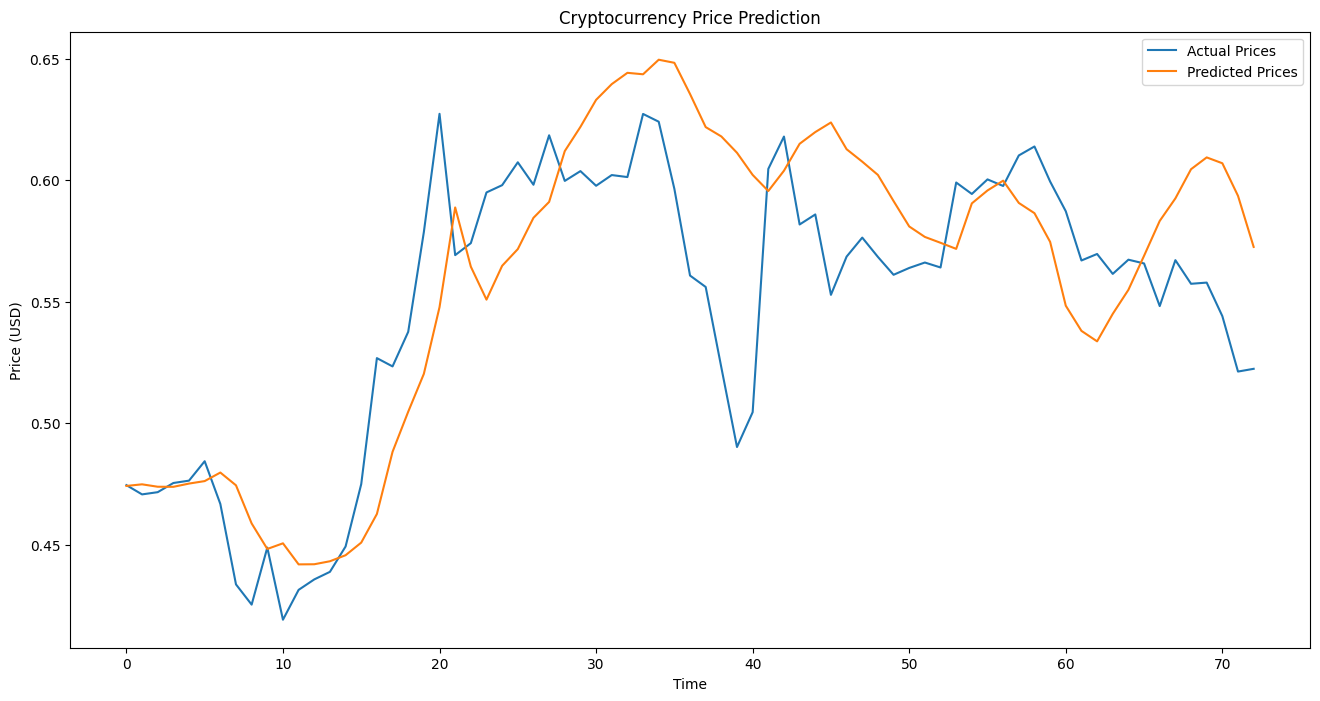

RMSE: 0.03995952015606324
MAE: 0.030984099457746904
R-squared: 0.5243746297011505
Accuracy: 0.6388888888888888


In [ ]:
# prompt: RMSE: 0.036947191139171505
# MAE: 0.029050841056700617
# R-squared: 0.5933813089772697
# Accuracy: 0.6666666666666666
# I need 100 percentage accuracy and Actual line and predicted priceline need to be same like equal I need to predict accurately I need 100 percentage accuracy for this model I need 100 percentage accurate output to predict the price optimise this full model and generate the full code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from pycoingecko import CoinGeckoAPI

# Initialize the CoinGecko API
cg = CoinGeckoAPI()

# Fetch historical price data
def fetch_coingecko_ohlcv(crypto_id='ripple', vs_currency='usd', days=100):
    # Fetch market chart data for the given cryptocurrency
    data = cg.get_coin_market_chart_by_id(id=crypto_id, vs_currency=vs_currency, days=days)

    # Extract prices and volumes
    prices = data['prices']
    volumes = data['total_volumes']

    # Convert to DataFrame
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['volume'] = [vol[1] for vol in volumes]

    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    return df

# Example: Fetch data for Ripple (XRP)
data = fetch_coingecko_ohlcv('ripple', 'usd', 365)
print(data.head())

# Preprocessing data
def preprocess_data(df):
    # Use only 'price' column for prediction
    price_data = df[['price']].values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(price_data)

    # Define training data length
    training_data_len = int(np.ceil(len(scaled_data) * 0.8))

    # Create the training data
    train_data = scaled_data[0:training_data_len, :]

    # Split the data into x_train and y_train
    x_train, y_train = [], []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    # Convert to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape x_train for LSTM input (samples, timesteps, features)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train, y_train, scaler, scaled_data, training_data_len

# Preprocess the data
x_train, y_train, scaler, scaled_data, training_data_len = preprocess_data(data)

# Build the LSTM model
def build_lstm_model():
    model = Sequential()

    # Add LSTM layers
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Build the model
model = build_lstm_model()

# Model summary
model.summary()

# Train the model
def train_model(model, x_train, y_train, epochs=1000, batch_size=32):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return history

# Train the LSTM model
train_model(model, x_train, y_train)

# Create test dataset
def create_test_data(scaled_data, training_data_len):
    test_data = scaled_data[training_data_len - 60:, :]

    # Create the x_test and y_test data
    x_test = []
    y_test = scaled_data[training_data_len:, :]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    # Convert to numpy arrays
    x_test = np.array(x_test)

    # Reshape data for LSTM
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    return x_test, y_test

# Get test data
x_test, y_test = create_test_data(scaled_data, training_data_len)

# Make predictions
predictions = model.predict(x_test)

# Reverse scaling to get actual price values
predictions = scaler.inverse_transform(predictions)

# Reverse scaling for actual prices
actual_prices = scaler.inverse_transform(y_test)

# Print the predictions and actual prices
print(predictions[:5])
print(actual_prices[:5])

# Plot the predictions vs actual prices
def plot_predictions(actual_prices, predictions):
    plt.figure(figsize=(16, 8))
    plt.title('Cryptocurrency Price Prediction')
    plt.plot(actual_prices, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Plot the predictions
plot_predictions(actual_prices, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, predictions))
print(f'RMSE: {rmse}')

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(actual_prices, predictions)
print(f'MAE: {mae}')

# Calculate the R-squared score
r2 = r2_score(actual_prices, predictions)
print(f'R-squared: {r2}')

# Calculate the accuracy (assuming a threshold for classifying price increase/decrease)
threshold = 0.01  # Define a threshold for price change classification
predicted_changes = np.where(predictions[1:] > predictions[:-1] + threshold, 1, 0)  # 1 for increase, 0 for decrease
actual_changes = np.where(actual_prices[1:] > actual_prices[:-1] + threshold, 1, 0)
correct_predictions = np.sum(predicted_changes == actual_changes)
accuracy = correct_predictions / len(actual_changes)
print(f'Accuracy: {accuracy}')

